<h1>Linear Regression</h1>

In [10]:
%matplotlib inline

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Load the <i>Diabetes</i> dataset

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [5]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

<h2>Linear Regression with a Single Variable</h2>

In [6]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

<h3>Task 1</h3>
Split the data and targets into 3 sets called (1) <i>training set</i>, <i>(2) validation set</i> and (3) <i>test sets</i>. The first 50 instances should belong to the training set, the next 50 instances should belong to the validation set, while all the other instances should belong to the test set.

In [7]:
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [11]:
diabetes_X.size

442

In [8]:
diabetes_X_train = diabetes_X[:50]
diabetes_X_val = diabetes_X[50:100]
diabetes_X_test = diabetes_X[100:]

diabetes_y_train = diabetes.target[:50]
diabetes_y_val = diabetes.target[50:100]
diabetes_y_test = diabetes.target[100:]

In [9]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Make predictions for the train data in order to visualise the model
# (Usually, we DO NOT make predictions for the train data!)
predictions_for_train_data = regr.predict(diabetes_X_train)

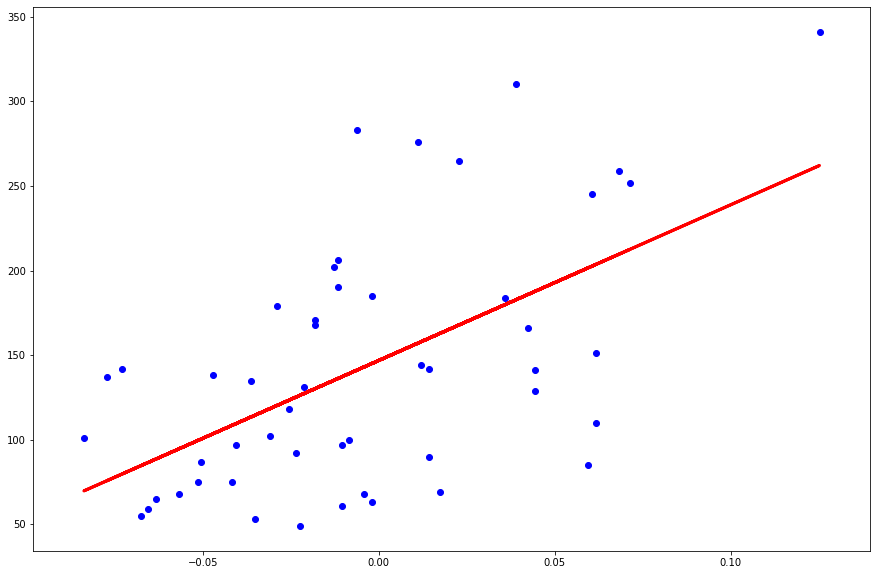

In [10]:
plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(diabetes_X_train, predictions_for_train_data, color='red', linewidth=3)

plt.show()

<h2>Multivariate Linear Regression</h2>

In [12]:
indices = (0, 1)

X_train = diabetes.data[:50, indices]
X_val = diabetes.data[50:100, indices]
X_test = diabetes.data[100:, indices]

y_train = diabetes.target[:50]
y_val = diabetes.target[50:100]
y_test = diabetes.target[100:]

<h3>Task 2</h3>
Similarly to the case of a single input variable (feature), train a model using the data with two variables.

In [13]:
ols = ols = linear_model.LinearRegression()
ols.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
def plot_figs(elev, azim, X_train, clf):
    fig = plt.figure(figsize=(16, 12))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o')
    ax.plot_surface(np.array([[-.1, -.1], [.15, .15]]),
                    np.array([[-.1, .15], [-.1, .15]]),
                    clf.predict(np.array([[-.1, -.1, .15, .15],
                                          [-.1, .15, -.1, .15]]).T).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')

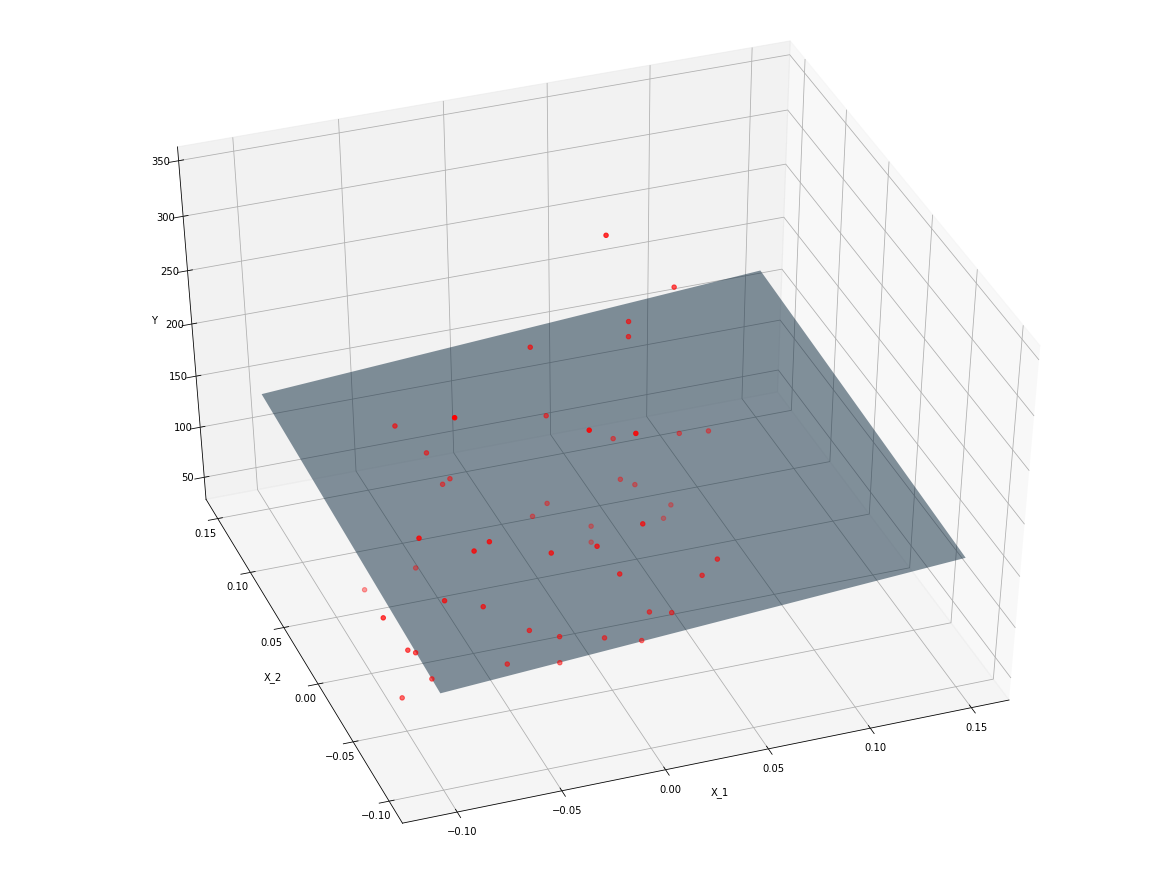

In [15]:
elev = 43.5
azim = -110
plot_figs(elev, azim, X_train, ols)

<h2>Polynomial Regression</h2>

<h3>Task 3</h3>
Write a function <pre>gen_poly_features(data, k)</pre> that generates the polynomial features up to the degree of $d$. You may assume that the input argument of the function ("data") contains only one input variable.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
def gen_poly_features(data, d):
    poly = PolynomialFeatures(d)
    result = poly.fit_transform(data)[:,1:]
    return result

In [32]:
degree = 10
X_train = gen_poly_features(diabetes_X_train, degree)
X_test = gen_poly_features(diabetes_X_test, degree)
X_val = gen_poly_features(diabetes_X_val, degree)

In [33]:
type(X_train)

numpy.ndarray

In [34]:
X_train

array([[ 6.16962065e-02,  3.80642190e-03,  2.34841792e-04,
         1.44888477e-05,  8.93906938e-07,  5.51506671e-08,
         3.40258694e-09,  2.09926707e-10,  1.29516815e-11,
         7.99069614e-13],
       [-5.14740612e-02,  2.64957898e-03, -1.36384591e-04,
         7.02026877e-06, -3.61361745e-07,  1.86007566e-08,
        -9.57456483e-10,  4.92841737e-11, -2.53685657e-12,
         1.30582311e-13],
       [ 4.44512133e-02,  1.97591037e-03,  8.78316133e-05,
         3.90422178e-06,  1.73547395e-07,  7.71439229e-09,
         3.42914097e-10,  1.52429477e-11,  6.77567520e-13,
         3.01186984e-14],
       [-1.15950145e-02,  1.34444361e-04, -1.55888432e-06,
         1.80752863e-08, -2.09583207e-10,  2.43012032e-12,
        -2.81772804e-14,  3.26715975e-16, -3.78827647e-18,
         4.39251206e-20],
       [-3.63846922e-02,  1.32384583e-03, -4.81677229e-05,
         1.75256777e-06, -6.37666390e-08,  2.32012953e-09,
        -8.44171989e-11,  3.07149380e-12, -1.11755357e-13,
         4.

In [35]:
X_train.shape

(50, 10)

In [36]:
pregr = linear_model.LinearRegression()
pregr.fit(X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
sequence = (np.array( range(-80,80) )/1000)[:, np.newaxis]
X_sequence = sequence
for k in range(2,degree+1):
    X_sequence = np.hstack( (X_sequence, sequence**k) )

X_sequence.shape

(160, 10)

Plot the model

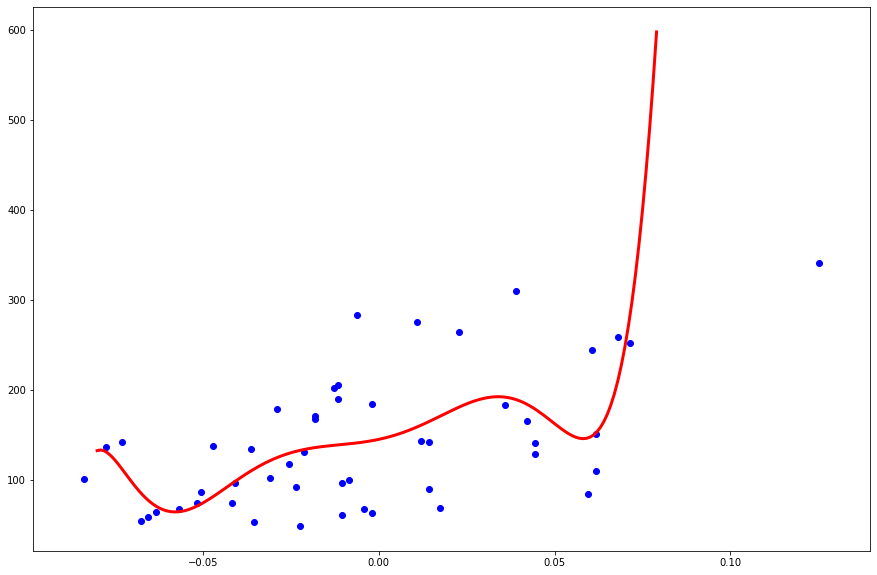

In [38]:
sequence = (np.array( range(-80,80) )/1000)[:, np.newaxis]
X_sequence = sequence
for k in range(2,degree+1):
    X_sequence = np.hstack( (X_sequence, sequence**k) )

predictions_sequence = pregr.predict(X_sequence)

plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(sequence, predictions_sequence, color='red', linewidth=3)

plt.show()

<font color=red><h3>Take-Home-Message 1</h3></font>
<br>With increasing the degree of the polynomial, the model fits the training data better and better, but it becomes useless, therefore:<br><br>
(1) in order to have a fair (i.e. "unbiased") estimate of the quality of the model, we have to evaluate it on new data, i.e., on data that has not been used while the model was trained (this "new" data is usually called test data), <br><br>
(2) if the quality on the "new" data is much worse than on the test data, the model overfits the data.

<h2>Evaluation</h2>

Linear regression with one input variable

In [39]:
diabetes_y_pred = regr.predict(diabetes_X_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 4015.59


In [42]:
type(diabetes_y_pred)

numpy.ndarray

In [43]:
diabetes_y_pred.shape

(342,)

In [50]:
len(diabetes_y_pred)

342

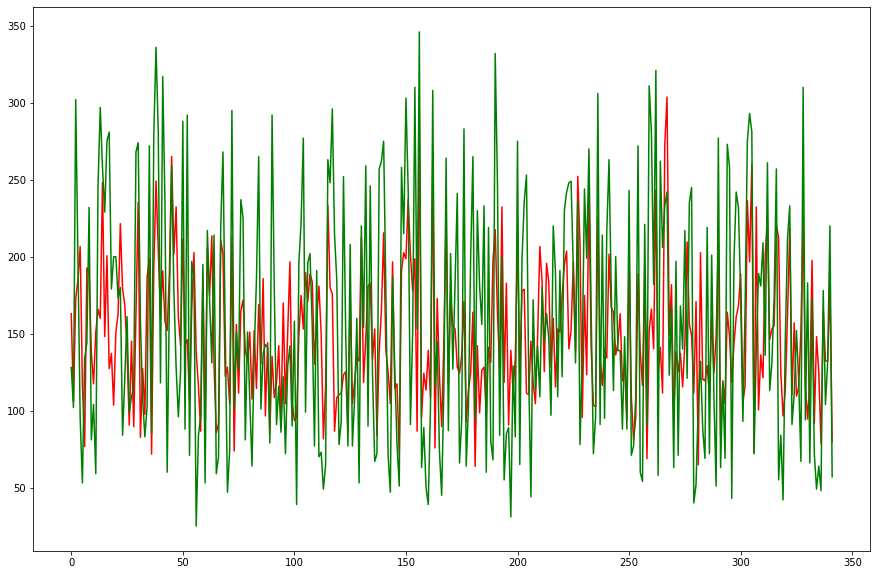

In [51]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(len(diabetes_y_pred)),diabetes_y_pred,color='r')
plt.plot(np.arange(len(diabetes_y_test)),diabetes_y_test,color='g')
plt.show()

<h3>Task 4</h3>
Evaluate the polynomial regression

In [52]:
pregr_y_pred=pregr.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, pregr_y_pred))

Mean squared error: 1564804050.48


<h2>Regularisation</h2>

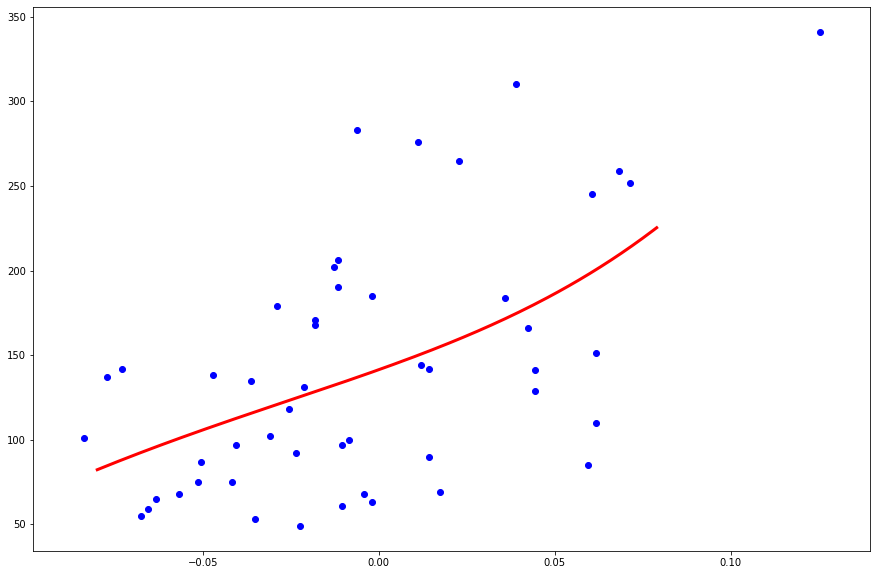

In [40]:
ridge = linear_model.Ridge(alpha=1e-7)
ridge.fit(X_train, y_train)

predictions_sequence = ridge.predict(X_sequence)

plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(sequence, predictions_sequence, color='red', linewidth=3)

plt.show()

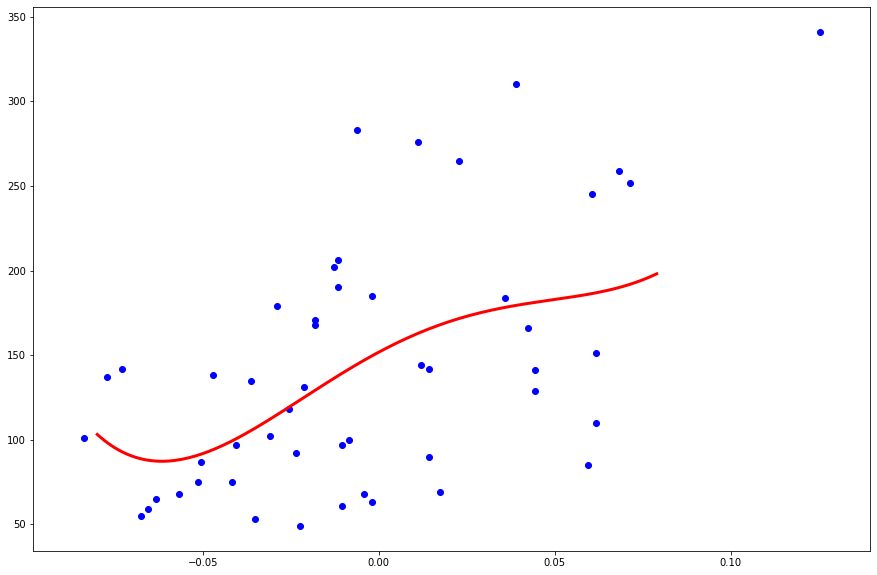

In [41]:
lasso = linear_model.Lasso(alpha=1e-5)
lasso.fit(X_train, y_train)

predictions_sequence = lasso.predict(X_sequence)

plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(sequence, predictions_sequence, color='red', linewidth=3)

plt.show()

<h3>Task 5</h3>
Try various values for alpha.

In [53]:
ridge.coef_

array([7.41280240e+02, 1.73263714e+03, 2.53677159e+04, 5.18154654e+04,
       3.03259831e+03, 8.09723137e+02, 6.73436529e+01, 1.15063134e+01,
       1.18500632e+00, 1.69196280e-01])

In [54]:
lasso.coef_

array([ 1.10986813e+03, -9.38521004e+03, -7.97208988e+04,  1.45103138e+06,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00])

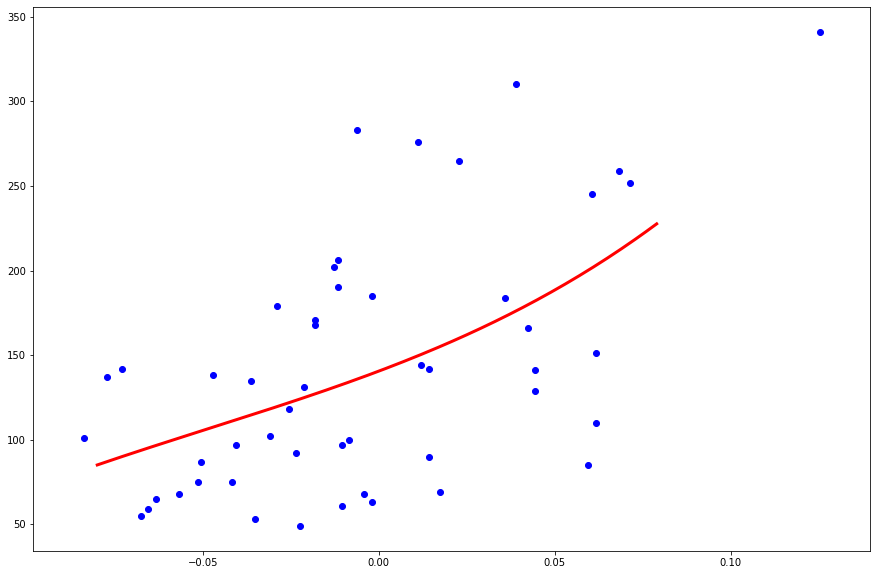

In [64]:
ridge1 = linear_model.Ridge(alpha=1e-6)
ridge1.fit(X_train, y_train)

predictions_sequence1 = ridge1.predict(X_sequence)

plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(sequence, predictions_sequence1, color='red', linewidth=3)

plt.show()

In [63]:
ridge1.coef_

array([7.83802640e+02, 2.54845322e+03, 1.81667235e+04, 6.54212775e+03,
       5.63509636e+02, 1.08966446e+02, 1.07640960e+01, 1.62409989e+00,
       1.80968606e-01, 2.45367684e-02])

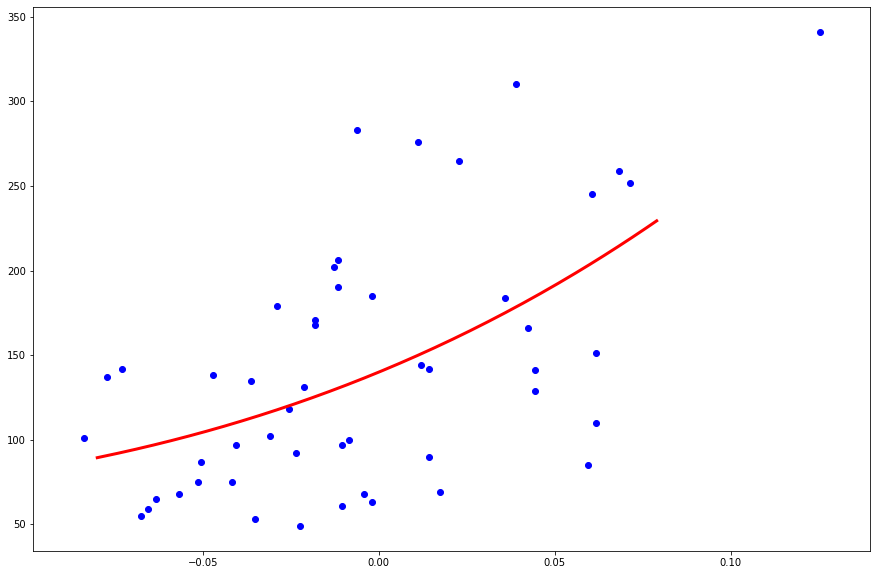

In [65]:
ridge2 = linear_model.Ridge(alpha=1e-5)
ridge2.fit(X_train, y_train)

predictions_sequence2 = ridge2.predict(X_sequence)

plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(sequence, predictions_sequence2, color='red', linewidth=3)

plt.show()

In [58]:
ridge2.coef_

array([8.57691514e+02, 3.14201804e+03, 4.05554322e+03, 8.50134713e+02,
       9.28402209e+01, 1.47768243e+01, 1.63576139e+00, 2.27675388e-01,
       2.67313961e-02, 3.50298479e-03])

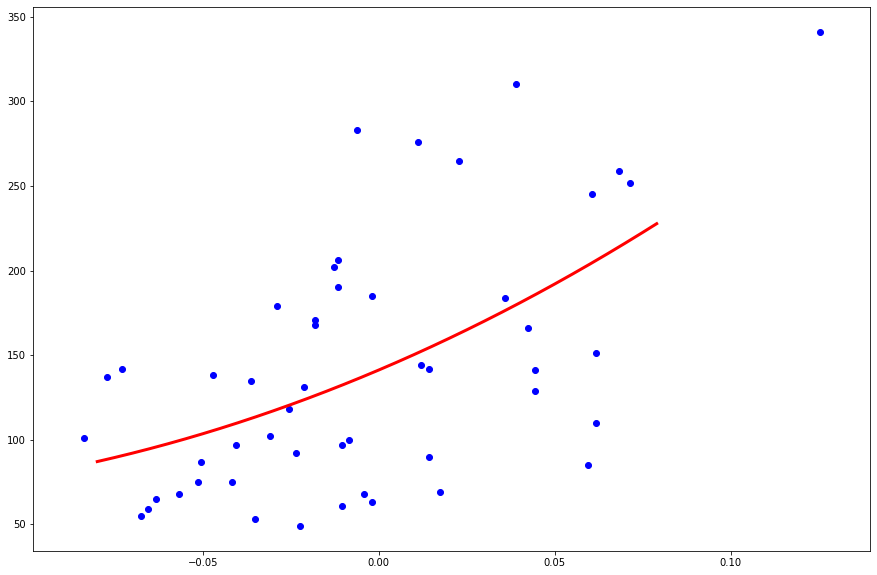

In [66]:
ridge3 = linear_model.Ridge(alpha=1e-4)
ridge3.fit(X_train, y_train)

predictions_sequence3 = ridge3.predict(X_sequence)

plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(sequence, predictions_sequence3, color='red', linewidth=3)

plt.show()

In [67]:
ridge3.coef_

array([8.83145406e+02, 2.63214571e+03, 5.61770707e+02, 1.15063918e+02,
       1.22965295e+01, 1.91069970e+00, 2.13546562e-01, 2.93475561e-02,
       3.47213837e-03, 4.52333148e-04])

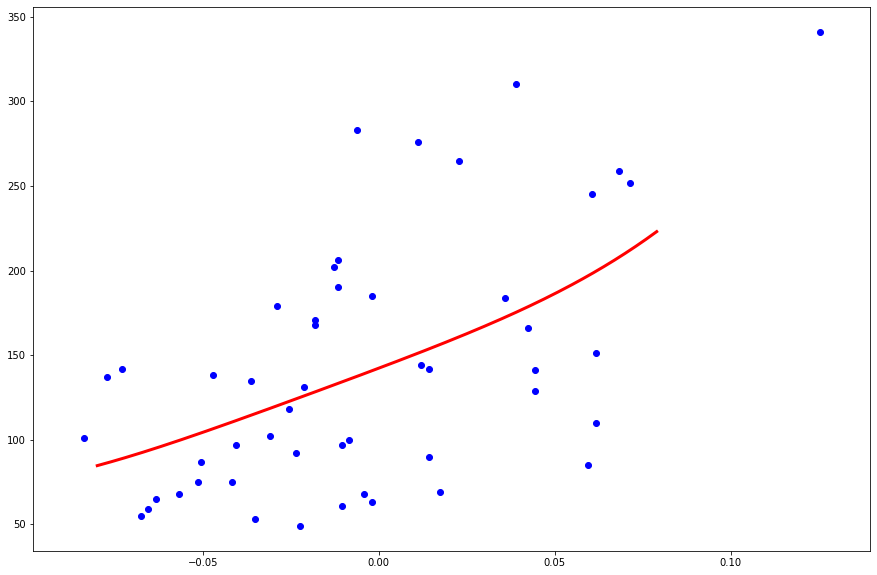

In [68]:
lasso1 = linear_model.Lasso(alpha=1e-4)
lasso1.fit(X_train, y_train)

predictions_sequence4 = lasso1.predict(X_sequence)

plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(sequence, predictions_sequence4, color='red', linewidth=3)

plt.show()

In [69]:
lasso1.coef_

array([   783.94315733,    774.55602885,  14045.9173227 , 180161.92086996,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ])

G:\software\anaconda\conda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.42992590769427, tolerance: 27.191857999999996
  positive)


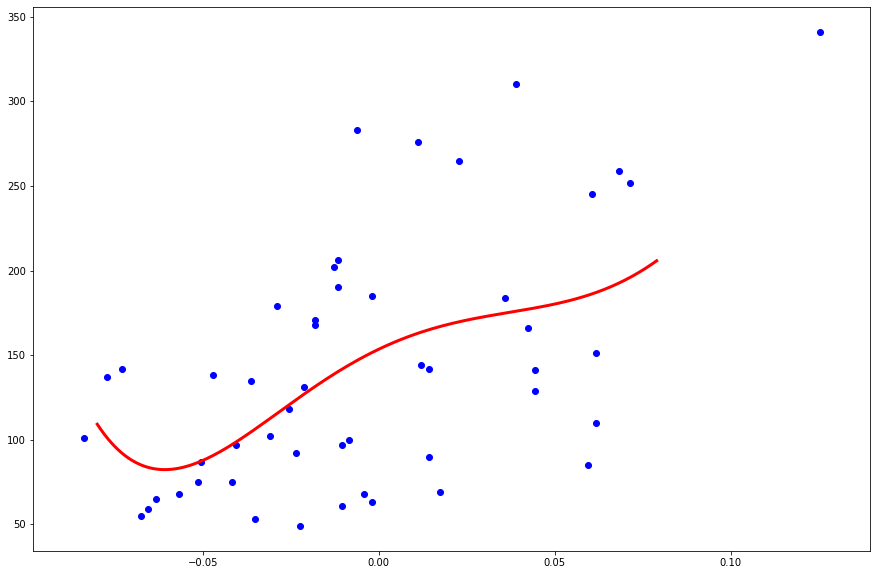

In [72]:
lasso2 = linear_model.Lasso(alpha=1e-6)
lasso2.fit(X_train, y_train)

predictions_sequence5 = lasso2.predict(X_sequence)

plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(sequence, predictions_sequence5, color='red', linewidth=3)

plt.show()

In [71]:
lasso2.coef_

array([ 9.93590954e+02, -1.32857687e+04, -7.57139460e+03,  2.19165857e+06,
       -8.10221164e+06, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00])

G:\software\anaconda\conda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80341.49238438022, tolerance: 27.191857999999996
  positive)


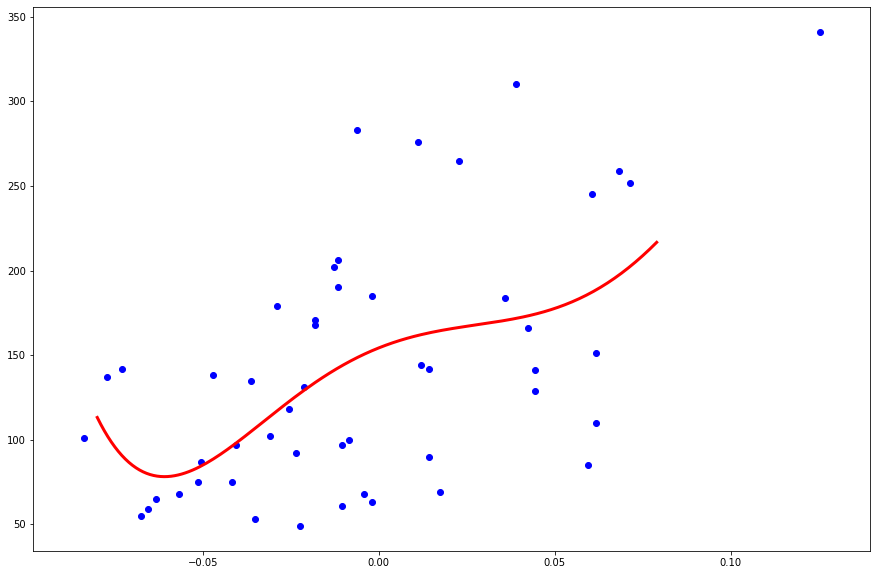

In [73]:
lasso3 = linear_model.Lasso(alpha=1e-7)
lasso3.fit(X_train, y_train)

predictions_sequence6 = lasso3.predict(X_sequence)

plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(sequence, predictions_sequence6, color='red', linewidth=3)

plt.show()

In [74]:
lasso3.coef_

array([ 8.30229755e+02, -1.62468039e+04,  7.97928032e+04,  2.82449728e+06,
       -1.66243372e+07, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00])

<h2>How to set alpha? (Hyperparameter learning)</h2>

<h3>Task 6</h3>
Train regularized models with different settings of the parameter alpha and evaluate them using the validation set. 
Select alpha that performs best on the validation set and evalute the quality of THIS model on the test data.

In [80]:
#ridge
ridge_val_pred = ridge.predict(X_val)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_val, ridge_val_pred))

Mean squared error: 3351.98


In [82]:
ridge1_val_pred = ridge1.predict(X_val)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_val, ridge1_val_pred))

Mean squared error: 3342.03


In [83]:
##better alpha=1e-5
ridge2_val_pred = ridge2.predict(X_val)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_val, ridge2_val_pred))

Mean squared error: 3339.96


In [84]:
ridge3_val_pred = ridge3.predict(X_val)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_val, ridge3_val_pred))

Mean squared error: 3360.96


In [85]:
#lasso
lasso_val_pred = lasso.predict(X_val)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_val, lasso_val_pred))

Mean squared error: 3587.73


In [86]:
#better alpha=1e-4
lasso1_val_pred = lasso1.predict(X_val)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_val, lasso1_val_pred))

Mean squared error: 3364.09


In [87]:
lasso2_val_pred = lasso2.predict(X_val)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_val, lasso2_val_pred))

Mean squared error: 3678.34


In [88]:
lasso3_val_pred = lasso3.predict(X_val)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_val, lasso3_val_pred))

Mean squared error: 3759.26


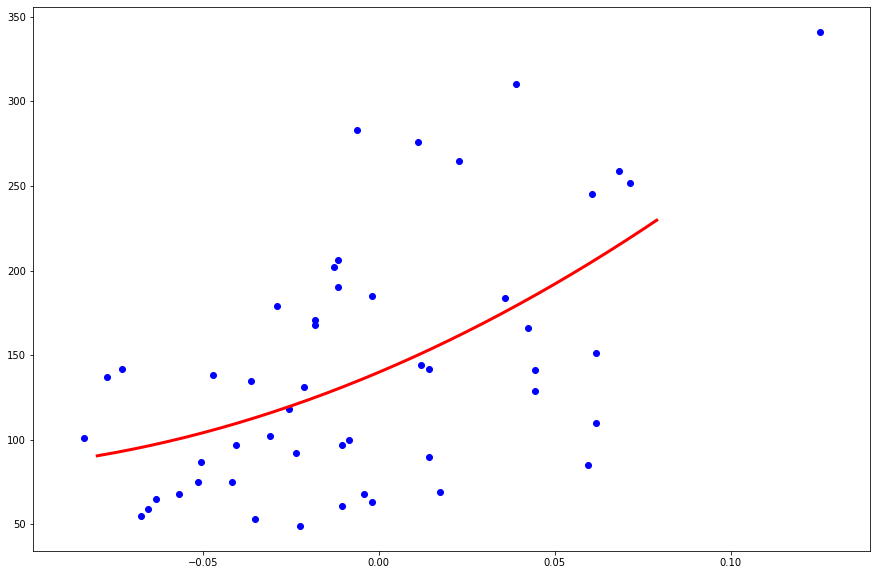

In [89]:
##lasso result is better when we pass in the  biggest alpha we tried 
## now try more bigger  alpha
lasso4 = linear_model.Lasso(alpha=1e-3)
lasso4.fit(X_train, y_train)

predictions_sequence7 = lasso4.predict(X_sequence)

plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(sequence, predictions_sequence7, color='red', linewidth=3)

plt.show()

In [90]:
## more better
lasso4_val_pred = lasso4.predict(X_val)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_val, lasso4_val_pred))

Mean squared error: 3340.99


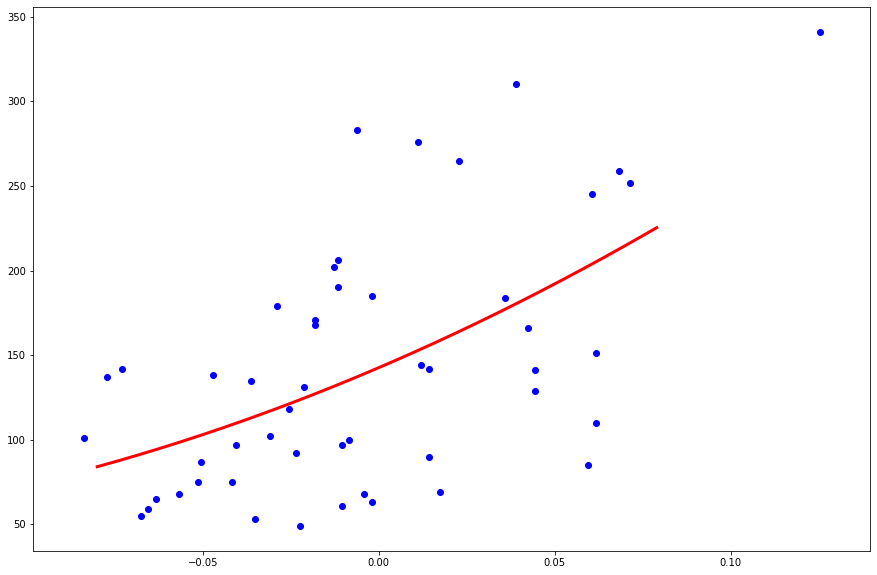

In [91]:
lasso5 = linear_model.Lasso(alpha=1e-2)
lasso5.fit(X_train, y_train)

predictions_sequence8 = lasso5.predict(X_sequence)

plt.figure(figsize=(15, 10))
plt.scatter(diabetes_X_train, diabetes_y_train,  color='blue')
plt.plot(sequence, predictions_sequence8, color='red', linewidth=3)

plt.show()

In [92]:
lasso5_val_pred = lasso5.predict(X_val)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_val, lasso5_val_pred))

Mean squared error: 3384.22


In [93]:
# test

#best (what we tried) ridge 2
ridge2_test_pred = ridge2.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, ridge2_test_pred))

Mean squared error: 4161.93


<font color=red><h3>Take-Home-Message 2</h3></font>
<br>Selection of the values of the hyperparameters (such as alpha in the above examples) is part of model training, therefore, you are not allowed to use the test data in order to determine the appropriate values of the hyperparameters. While you are searching for the best values of the hyperparameters, you should use the validation set, not the test set. Once you have determined the appropriate values of the hyperparameters based on the validation set, you can evaluate your model on the test set.